# Depedencies

In [749]:
import pandas as pd
import numpy as np
import time
import collections
import plotly.graph_objects as go
import plotly.express as px
import math
import seaborn as sn

# Import the Data from the excel

In [750]:
# Read the printify products excel file into pandas dataframe
orders = pd.read_excel('Printify_Data_Analyst_homework.xlsx', sheet_name = 'Orders')
orders.head()

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT
0,7143578,2013244.178,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,2200,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29
1,5888534,1358429.695,1358429,US,MN,2020-11-21 05:19:03,2020-11-23 00:23:32,NaN,4,1149,924,2018-02-08 07:34:02,True,business_account_3,USPS,2020-11-28 21:50:56
2,6484224,939390.193,939390,US,AK,2020-10-25 01:39:08,2020-10-26 20:30:53,NaN,1,977,400,2019-04-09 20:02:46,True,business_account_3,USPS,2020-11-02 23:37:54
3,7251033,1856107.400,1856107,US,PA,2020-10-08 16:35:21,2020-10-10 15:02:47,NaN,1,661,800,2020-07-20 17:04:41,True,business_account_3,UPS,2020-10-15 18:08:37
4,7241488,1843904.400,1843904,US,CO,2020-11-17 19:30:10,2020-11-18 03:45:25,NaN,2,719,424,2020-07-15 18:47:51,True,business_account_3,USPS,2020-11-24 00:44:56


In [751]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13506 entries, 0 to 13505
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MERCHANT_ID             13506 non-null  int64         
 1   ORDER_ID                13506 non-null  float64       
 2   SHOP_ID                 13506 non-null  int64         
 3   ADDRESS_TO_COUNTRY      13505 non-null  object        
 4   ADDRESS_TO_REGION       12930 non-null  object        
 5   ORDER_DT                13506 non-null  datetime64[ns]
 6   FULFILLED_DT            12637 non-null  datetime64[ns]
 7   REPRINT_FLAG            103 non-null    float64       
 8   SALES_CHANNEL_TYPE_ID   13506 non-null  int64         
 9   TOTAL_COST              13506 non-null  int64         
 10  TOTAL_SHIPPING          13506 non-null  int64         
 11  MERCHANT_REGISTERED_DT  13506 non-null  datetime64[ns]
 12  SUB_IS_ACTIVE_FLAG      13506 non-null  bool  

In [752]:
# Read the printify products excel file into pandas dataframe
new_line_items = pd.read_excel('Printify_Data_Analyst_homework.xlsx', sheet_name = 'Line items')
new_line_items.head(20)

,ORDER_ID,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,1.750015e+06,30,Generic brand,Mug,on-hold,3
1,1.750015e+06,30,Generic brand,Mug,on-hold,2
2,1.225155e+06,16,Gildan,Kids clothes,shipment_delivered,1
3,1.828891e+06,39,Bella+Canvas,T-Shirt,shipment_delivered,1
4,1.847848e+06,10,Generic brand,Accessories,shipment_delivered,1
5,1.750016e+06,30,Generic brand,Mug,on-hold,1
6,4.668482e+05,10,Generic brand,Bags,shipment_delivered,1
7,1.569960e+06,45,Gildan,Sweatshirt,fulfilled,1
8,2.004430e+06,29,Gildan,Sweatshirt,shipment_delivered,1
9,2.255664e+05,25,Bella+Canvas,T-Shirt,shipment_delivered,1


In [753]:
new_line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57583 entries, 0 to 57582
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           57583 non-null  float64
 1   PRINT_PROVIDER_ID  57583 non-null  int64  
 2   PRODUCT_BRAND      57583 non-null  object 
 3   PRODUCT_TYPE       57583 non-null  object 
 4   ITEM_STATUS        57583 non-null  object 
 5   QUANTITY           57583 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.6+ MB


# Clean The data

## line_items cleaning

In [754]:
# Remove duplicates 
line_items = new_line_items.drop_duplicates(subset=['ORDER_ID', 'PRINT_PROVIDER_ID', 'PRODUCT_BRAND', 'PRODUCT_TYPE', 'ITEM_STATUS'])

# DOn't remove orders with similar characteristics except quantity
#line_items = new_line_items.drop_duplicates(subset=['ORDER_ID', 'PRINT_PROVIDER_ID', 'PRODUCT_BRAND', 'PRODUCT_TYPE', 'ITEM_STATUS', 'QUANTITY'])
line_items.reset_index(drop=True, inplace=True)
line_items

,ORDER_ID,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,1.750015e+06,30,Generic brand,Mug,on-hold,3
1,1.750015e+06,30,Generic brand,Mug,on-hold,2
2,1.225155e+06,16,Gildan,Kids clothes,shipment_delivered,1
3,1.828891e+06,39,Bella+Canvas,T-Shirt,shipment_delivered,1
4,1.847848e+06,10,Generic brand,Accessories,shipment_delivered,1
...,...,...,...,...,...,...
15616,1.735807e+06,2,Generic brand,Canvas,shipment_delivered,1
15617,1.732949e+06,26,Gildan,T-Shirt,fulfilled,1
15618,1.449381e+06,29,Gildan,Sweatshirt,shipment_out_for_delivery,1
15619,1.735807e+06,48,Generic brand,Mug,shipment_delivered,1


## Orders cleaning

In [755]:
# First rows encounter with duplicated order_id 
duplicate_orders1 = orders[orders['ORDER_ID'].duplicated(keep='last')]
duplicate_orders1

# Second rows encounter with duplicated order_id 
duplicate_orders2 = orders[orders['ORDER_ID'].duplicated(keep='first')]
duplicate_orders2

# Combine the duplicated rows into one dataframe for closer comparison
duplicates = pd.concat([duplicate_orders1, duplicate_orders2]).sort_values(by=['MERCHANT_ID'])
duplicates

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT
537,5868230,3.635962e+05,363596,US,VI,2020-11-18 19:36:02,2020-11-19 15:23:46,NaN,2,9533,2616,2018-01-16 11:29:38,True,business_account_3,USPS,2020-11-24 17:34:42
538,5868230,3.635962e+05,363596,US,VI,2020-11-18 19:36:02,2020-11-19 15:23:46,NaN,2,9533,2616,2018-01-16 11:29:38,True,business_account_3,USPS,2020-11-28 16:51:06
5436,6118692,5.160665e+05,516066,US,MD,2020-10-11 04:30:55,2020-10-13 01:11:15,NaN,1,1979,850,2018-09-13 12:23:50,True,business_account_3,USPS,2020-10-16 19:44:40
5437,6118692,5.160665e+05,516066,US,MD,2020-10-11 04:30:55,2020-10-13 01:11:15,NaN,1,1979,850,2018-09-13 12:23:50,True,business_account_3,UPS_MAIL_INNOVATIONS,2020-10-19 19:21:56
13,6314037,7.521543e+05,752154,US,WA,2020-10-03 13:05:53,2020-10-07 20:20:59,NaN,2,14732,3884,2019-01-25 17:38:56,False,business_account_3,USPS,2020-10-09 21:38:49
14,6314037,7.521543e+05,752154,US,WA,2020-10-03 13:05:53,2020-10-07 20:20:59,NaN,2,14732,3884,2019-01-25 17:38:56,False,business_account_3,NaN,NaT
7502,7016547,1.555863e+06,1555863,US,TX,2020-10-29 22:10:53,2020-11-02 18:07:59,NaN,1,167,350,2020-02-17 23:36:26,True,business_account_3,USPS,2020-11-05 20:05:27
5285,7016547,1.555863e+06,1555863,US,LA,2020-10-11 01:33:06,2020-10-14 21:42:00,NaN,1,103,350,2020-02-17 23:36:26,True,business_account_3,NaN,NaT
6069,7223323,1.820693e+06,1820693,US,SC,2020-11-04 04:20:21,2020-11-09 18:34:04,NaN,3,6855,2624,2020-07-06 19:27:58,True,business_account_3,USPS,2020-11-09 22:02:28
6070,7223323,1.820693e+06,1820693,US,SC,2020-11-04 04:20:21,2020-11-09 18:34:04,NaN,3,6855,2624,2020-07-06 19:27:58,True,business_account_3,USPS,2020-11-13 20:28:54


In [756]:
orders.drop_duplicates(subset=['MERCHANT_ID', 'ORDER_ID'], 
                               inplace=True, keep='last')

In [757]:
# Not complete in removing the errors
orders.drop_duplicates(subset=['MERCHANT_ID', 'ORDER_ID', 
                               'SHOP_ID', 'ADDRESS_TO_COUNTRY', 
                               'ADDRESS_TO_REGION','ORDER_DT',
                               'FULFILLED_DT','REPRINT_FLAG',
                               'SALES_CHANNEL_TYPE_ID',
                               'TOTAL_COST','TOTAL_SHIPPING',
                               'MERCHANT_REGISTERED_DT',
                               'SUB_IS_ACTIVE_FLAG','SUB_PLAN', 
                               'SHIPMENT_CARRIER'], inplace=True,
                                  keep='last')
orders.reset_index(drop=True, inplace=True)

In [758]:
orders

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT
0,7143578,2.013244e+06,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,2200,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29
1,5888534,1.358430e+06,1358429,US,MN,2020-11-21 05:19:03,2020-11-23 00:23:32,NaN,4,1149,924,2018-02-08 07:34:02,True,business_account_3,USPS,2020-11-28 21:50:56
2,6484224,9.393902e+05,939390,US,AK,2020-10-25 01:39:08,2020-10-26 20:30:53,NaN,1,977,400,2019-04-09 20:02:46,True,business_account_3,USPS,2020-11-02 23:37:54
3,7251033,1.856107e+06,1856107,US,PA,2020-10-08 16:35:21,2020-10-10 15:02:47,NaN,1,661,800,2020-07-20 17:04:41,True,business_account_3,UPS,2020-10-15 18:08:37
4,7241488,1.843904e+06,1843904,US,CO,2020-11-17 19:30:10,2020-11-18 03:45:25,NaN,2,719,424,2020-07-15 18:47:51,True,business_account_3,USPS,2020-11-24 00:44:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,7562898,2.225081e+06,2225081,CA,ON,2020-11-05 21:12:29,NaT,NaN,1,0,0,2020-10-29 16:51:47,False,NaN,NaN,NaT
13491,7475289,2.153683e+06,2153683,US,CO,2020-11-16 04:11:43,NaT,NaN,1,1447,474,2020-09-30 23:11:41,True,business_account_3,NaN,NaT
13492,7144356,1.717608e+06,1717607,US,CT,2020-12-25 00:08:07,NaT,NaN,1,2187,824,2020-05-20 01:38:41,False,NaN,NaN,NaT
13493,7581194,2.243421e+06,2243420,US,IN,2020-11-19 16:43:04,NaT,NaN,4,2187,824,2020-11-05 20:02:09,False,NaN,NaN,NaT


## Prepare for Joining

In [759]:
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(line_items['ORDER_ID'])):
    order = str(line_items.loc[i]['ORDER_ID']).split(".")
    line_items.at[i, 'ORDER_ID'] = int(order[-1])
    line_items.at[i,'SHOP_ID'] = int(order[0])
line_items

,ORDER_ID,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY,SHOP_ID
0,15208.0,30,Generic brand,Mug,on-hold,3,1750015.0
1,12357.0,30,Generic brand,Mug,on-hold,2,1750015.0
2,10081.0,16,Gildan,Kids clothes,shipment_delivered,1,1225155.0
3,707.0,39,Bella+Canvas,T-Shirt,shipment_delivered,1,1828890.0
4,55.0,10,Generic brand,Accessories,shipment_delivered,1,1847847.0
...,...,...,...,...,...,...,...
15616,1367.0,2,Generic brand,Canvas,shipment_delivered,1,1735807.0
15617,7852.0,26,Gildan,T-Shirt,fulfilled,1,1732948.0
15618,11854.0,29,Gildan,Sweatshirt,shipment_out_for_delivery,1,1449381.0
15619,2759.0,48,Generic brand,Mug,shipment_delivered,1,1735807.0


In [760]:
for i in range(len(orders['ORDER_ID'])):
    order = str(orders.loc[i]['ORDER_ID']).split(".")
    orders.at[i, 'ORDER_ID'] = int(order[-1])
orders

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,TOTAL_SHIPPING,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT
0,7143578,178.0,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,2200,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29
1,5888534,695.0,1358429,US,MN,2020-11-21 05:19:03,2020-11-23 00:23:32,NaN,4,1149,924,2018-02-08 07:34:02,True,business_account_3,USPS,2020-11-28 21:50:56
2,6484224,193.0,939390,US,AK,2020-10-25 01:39:08,2020-10-26 20:30:53,NaN,1,977,400,2019-04-09 20:02:46,True,business_account_3,USPS,2020-11-02 23:37:54
3,7251033,4.0,1856107,US,PA,2020-10-08 16:35:21,2020-10-10 15:02:47,NaN,1,661,800,2020-07-20 17:04:41,True,business_account_3,UPS,2020-10-15 18:08:37
4,7241488,4.0,1843904,US,CO,2020-11-17 19:30:10,2020-11-18 03:45:25,NaN,2,719,424,2020-07-15 18:47:51,True,business_account_3,USPS,2020-11-24 00:44:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,7562898,12.0,2225081,CA,ON,2020-11-05 21:12:29,NaT,NaN,1,0,0,2020-10-29 16:51:47,False,NaN,NaN,NaT
13491,7475289,2224.0,2153683,US,CO,2020-11-16 04:11:43,NaT,NaN,1,1447,474,2020-09-30 23:11:41,True,business_account_3,NaN,NaT
13492,7144356,5.0,1717607,US,CT,2020-12-25 00:08:07,NaT,NaN,1,2187,824,2020-05-20 01:38:41,False,NaN,NaN,NaT
13493,7581194,66.0,2243420,US,IN,2020-11-19 16:43:04,NaT,NaN,4,2187,824,2020-11-05 20:02:09,False,NaN,NaN,NaT


# Join the Data

In [761]:
# Join the two dataframes to form one where each merchant is 
# Matched with all their orders and shops
printify_df = pd.merge(orders, line_items, how="inner", on=['ORDER_ID','SHOP_ID'])

In [762]:
printify_df

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,...,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,7143578,178.0,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,...,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29,1,Generic brand,Mug,shipment_delivered,1
1,7143578,178.0,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,...,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29,16,Generic brand,Mug,shipment_delivered,1
2,5888534,695.0,1358429,US,MN,2020-11-21 05:19:03,2020-11-23 00:23:32,NaN,4,1149,...,2018-02-08 07:34:02,True,business_account_3,USPS,2020-11-28 21:50:56,39,Gildan,Sweatshirt,shipment_delivered,1
3,6484224,193.0,939390,US,AK,2020-10-25 01:39:08,2020-10-26 20:30:53,NaN,1,977,...,2019-04-09 20:02:46,True,business_account_3,USPS,2020-11-02 23:37:54,25,Delta,T-Shirt,shipment_delivered,1
4,7251033,4.0,1856107,US,PA,2020-10-08 16:35:21,2020-10-10 15:02:47,NaN,1,661,...,2020-07-20 17:04:41,True,business_account_3,UPS,2020-10-15 18:08:37,16,Generic brand,Mug,shipment_delivered,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,7562898,12.0,2225081,CA,ON,2020-11-05 21:12:29,NaT,NaN,1,0,...,2020-10-29 16:51:47,False,NaN,NaN,NaT,10,Generic brand,Accessories,canceled,10
15617,7475289,2224.0,2153683,US,CO,2020-11-16 04:11:43,NaT,NaN,1,1447,...,2020-09-30 23:11:41,True,business_account_3,NaN,NaT,16,Sport-Tek,Hats,on-hold,1
15618,7144356,5.0,1717607,US,CT,2020-12-25 00:08:07,NaT,NaN,1,2187,...,2020-05-20 01:38:41,False,NaN,NaN,NaT,3,Gildan,Hoodie,on-hold,1
15619,7581194,66.0,2243420,US,IN,2020-11-19 16:43:04,NaT,NaN,4,2187,...,2020-11-05 20:02:09,False,NaN,NaN,NaT,3,Gildan,Hoodie,canceled,1


In [763]:
printify_df['TOTAL_COST'].corr(printify_df['QUANTITY'])

0.2145729478601347

In [764]:
printify_df[printify_df[['MERCHANT_ID','ORDER_ID']].isna()]

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,...,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
15617,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
15618,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
15619,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [765]:
# Every row is unique in atleast one attribut
len(printify_df.duplicated())

15621

# Merchants Characteristics
For the purpose of this homework, metrics of success for a marchant are determined by the quality and quantity of orders completed. In this context;
- Quality - means that a merchant can deliver that customers won't / less often cancel the order.
- Quality - means a merchant sold more merchadise 
Other factors include:
- Revenue collected - The higher the better


# Total number of Orders

In [766]:
merchant_orders = printify_df[['MERCHANT_ID', 'ORDER_ID']].groupby(['MERCHANT_ID']).count()
merchant_orders.rename(columns={'ORDER_ID':'Total_Orders'})

,Total_Orders
MERCHANT_ID,
265,1
2071,6
2686,4
3058,1
3574,5
...,...
7723813,1
7724581,1
7725819,1


# Total revenue by each Merchant

In [767]:
merchant_revenue = printify_df[['MERCHANT_ID', 'TOTAL_COST']].groupby(['MERCHANT_ID']).sum()
merchant_revenue.rename(columns={'TOTAL_COST':'Total_revenue'}, inplace=True)
merchant_revenue

,Total_revenue
MERCHANT_ID,
265,1964
2071,5682
2686,25755
3058,845
3574,3675
...,...
7723813,1001
7724581,895
7725819,414


# Order Status (For each order)

In [768]:
printify_df[['MERCHANT_ID','ITEM_STATUS']]

,MERCHANT_ID,ITEM_STATUS
0,7143578,shipment_delivered
1,7143578,shipment_delivered
2,5888534,shipment_delivered
3,6484224,shipment_delivered
4,7251033,shipment_delivered
...,...,...
15616,7562898,canceled
15617,7475289,on-hold
15618,7144356,on-hold
15619,7581194,canceled


In [769]:
printify_df_temp = printify_df[['MERCHANT_ID','ITEM_STATUS']]
merchant_delivered = printify_df_temp[(printify_df['ITEM_STATUS'] == 'shipment_delivered') | 
                                     (printify_df['ITEM_STATUS'] == 'fulfilled') |
                                     (printify_df['ITEM_STATUS'] == 'shipment_in_transit') | 
                                     (printify_df['ITEM_STATUS'] == 'shipment_out_for_delivery') | 
                                     (printify_df['ITEM_STATUS'] == 'shipment_available_for_pickup') | 
                                     (printify_df['ITEM_STATUS'] == 'in-production') | 
                                     (printify_df['ITEM_STATUS'] == 'on-hold') |
                                     (printify_df['ITEM_STATUS'] == 'shipment_pre_transit') |
                                     (printify_df['ITEM_STATUS'] == None)].groupby(['MERCHANT_ID']).count()

merchant_delivered['Canceled'] = (printify_df_temp[(printify_df['ITEM_STATUS'] == 'canceled') |
                                                  (printify_df['ITEM_STATUS'] == 'shipment_error') |
                                                  (printify_df['ITEM_STATUS'] == 'shipment_cancelled') |
                                                  (printify_df['ITEM_STATUS'] == 'shipment_return_to_sender') | 
                                                  (printify_df['ITEM_STATUS'] == 'shipment_failure')].groupby(['MERCHANT_ID']).count()).fillna(0)

merchant_delivered.rename(columns={'ITEM_STATUS':'Derivered'}, inplace=True)
merchant_delivered

,Derivered,Canceled
MERCHANT_ID,,
265,1,NaN
2071,6,NaN
2686,4,NaN
3058,1,NaN
3574,5,NaN
...,...,...
7723813,1,NaN
7724581,1,NaN
7725819,1,NaN


In [770]:
len(printify_df['ITEM_STATUS'].isna())

15621

# Total number of Sales per Merchant

In [771]:
merchant_sales = printify_df[['MERCHANT_ID', 'QUANTITY']].groupby(['MERCHANT_ID']).sum()
merchant_sales.rename(columns={'QUANTITY':'Total_sales'}, inplace=True)
merchant_sales

,Total_sales
MERCHANT_ID,
265,4
2071,6
2686,4
3058,1
3574,6
...,...
7723813,1
7724581,1
7725819,1


In [772]:
printify_df['ITEM_STATUS'].unique()

array(['shipment_delivered', 'fulfilled', 'shipment_in_transit',
       'shipment_out_for_delivery', 'canceled',
       'shipment_available_for_pickup', 'shipment_pre_transit',
       'shipment_failure', 'in-production', 'shipment_return_to_sender',
       'on-hold', 'shipment_error', 'shipment_cancelled'], dtype=object)

# Order time Delay for each order

In [773]:
printify_df_temp1 = printify_df[['MERCHANT_ID', 'ORDER_DT','FULFILLED_DT']]
printify_df_temp1['Time_delay_hours'] = (printify_df['FULFILLED_DT'] - printify_df['ORDER_DT']).astype('timedelta64[h]')

merchant_delay = printify_df_temp1[['MERCHANT_ID', 'Time_delay_hours']].groupby(['MERCHANT_ID']).sum()
merchant_delay

,Time_delay_hours
MERCHANT_ID,
265,183.0
2071,436.0
2686,421.0
3058,50.0
3574,186.0
...,...
7723813,144.0
7724581,12.0
7725819,0.0


# Merchant Experience on Printify
Counted from the time they joined to the time the made a sale

In [774]:
printify_df_temp1 = printify_df[['MERCHANT_ID', 'MERCHANT_REGISTERED_DT']]
printify_df_temp1['Merchant_experience_months'] = (printify_df['ORDER_DT'].max() - printify_df['MERCHANT_REGISTERED_DT']).astype('timedelta64[M]')


merchant_experience = printify_df_temp1[['MERCHANT_ID', 'Merchant_experience_months']].groupby(['MERCHANT_ID']).median()
merchant_experience

,Merchant_experience_months
MERCHANT_ID,
265,43.0
2071,43.0
2686,43.0
3058,45.0
3574,46.0
...,...
7723813,0.0
7724581,0.0
7725819,0.0


In [775]:
merchant_perf['Merchant_experience_months'].max()

46.0

# Most Polular channel for each Merchant

In [776]:
Merchant_sales_channel = printify_df[['MERCHANT_ID', 'SALES_CHANNEL_TYPE_ID']].groupby(['MERCHANT_ID'], sort=True).last()

# Merchant_sales_channel = printify_df[['MERCHANT_ID', 'SALES_CHANNEL_TYPE_ID']][printify_df['SALES_CHANNEL_TYPE_ID'] == int(printify_df['SALES_CHANNEL_TYPE_ID'].mode())].groupby(['MERCHANT_ID']).sum()
# Merchant_sales_channel = printify_df[printify_df_temp1['SALES_CHANNEL_TYPE_ID'].mode()].groupby(['MERCHANT_ID']).count()
Merchant_sales_channel.rename(columns={'SALES_CHANNEL_TYPE_ID':'Popular_sales_channel'}, inplace=True)
Merchant_sales_channel

,Popular_sales_channel
MERCHANT_ID,
265,4
2071,1
2686,2
3058,2
3574,2
...,...
7723813,2
7724581,2
7725819,2


In [777]:
Merchant_sales_channel[Merchant_sales_channel['Popular_sales_channel'] == 4]

,Popular_sales_channel
MERCHANT_ID,
265,4
4132,4
15511,4
23131,4
304912,4
...,...
7692639,4
7705507,4
7709763,4


In [778]:
Merchant_sales_channel['Popular_sales_channel'].unique()

array([ 4,  1,  2, 11,  3,  6,  9,  7], dtype=int64)

In [779]:
printify_df['SALES_CHANNEL_TYPE_ID'].unique()

array([ 9,  4,  1,  2,  6,  3,  7, 11], dtype=int64)

## Outlier removal using Normal Distribution

# Merchant sucess metric used
Reference: https://www.bigcommerce.com/articles/ecommerce/ecommerce-metrics/#understanding-customer-stages

To measure the success of a merchant, I will use the average revenue collected per every successful order (i.e. Not cancelled order)
- Total revenue
- Total sales
- Total cancel
This is defined as Conversion metrics here done as average order value (AVO)
Another one is Cost per acquisition (CPA).


### Introducing Merchant Perfomance Metric dataframe 
- merchant_perf

In [805]:
# pd.concat([merchant_revenue, merchant_sales])
merchant_perf1 = pd.merge(merchant_revenue, merchant_sales, on=['MERCHANT_ID'])
merchant_perf2 = pd.merge(merchant_perf1, merchant_delivered, on=['MERCHANT_ID'])
merchant_perf3 = pd.merge(merchant_perf2, merchant_experience, on=['MERCHANT_ID'])
merchant_perf4 = pd.merge(merchant_perf3, Merchant_sales_channel, on=['MERCHANT_ID'])
merchant_perf5 = pd.merge(merchant_perf4, printify_df[['MERCHANT_ID', 'SUB_IS_ACTIVE_FLAG']], on=['MERCHANT_ID'], how='left')
merchant_perf = pd.merge(merchant_perf5, printify_df[['MERCHANT_ID', 'SUB_PLAN']], on=['MERCHANT_ID'], how='left')
merchant_perf.drop_duplicates(subset=['MERCHANT_ID'], inplace=True)
merchant_perf

,MERCHANT_ID,Total_revenue,Total_sales,Derivered,Canceled,Merchant_experience_months,Popular_sales_channel,SUB_IS_ACTIVE_FLAG,SUB_PLAN
0,265,1964,4,1,NaN,43.0,4,False,NaN
1,2071,5682,6,6,NaN,43.0,1,True,business_account_3
37,2686,25755,4,4,NaN,43.0,2,True,business_account_3
53,3058,845,1,1,NaN,45.0,2,False,NaN
54,3574,3675,6,5,NaN,46.0,2,True,business_account_3
...,...,...,...,...,...,...,...,...,...
298577,7723813,1001,1,1,NaN,0.0,2,False,NaN
298578,7724581,895,1,1,NaN,0.0,2,False,NaN
298579,7725819,414,1,1,NaN,0.0,2,False,NaN
298580,7726249,2184,1,1,NaN,0.0,2,False,NaN


In [806]:
merchant_perf.Total_revenue.describe()

count      4475.000000
mean       6880.132067
std       23642.890258
min         115.000000
25%         951.000000
50%        1925.000000
75%        5049.000000
max      738285.000000
Name: Total_revenue, dtype: float64

In [807]:
merchant_perf.Derivered.describe()

count    4475.000000
mean        3.346592
std         7.241900
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       163.000000
Name: Derivered, dtype: float64

# Basic EDA for merchant perfomance metrics

In [808]:
fig = px.scatter(merchant_perf, x="Merchant_experience_months", y="Total_revenue", 
                 trendline="ols", size="Total_revenue",
                labels={'x':'Total Revenue Collected', 'y':'Total Sales'}, 
                 title='Merchants total sales and revenue collected')
fig.show()

<AxesSubplot:xlabel='Total_sales', ylabel='Count'>

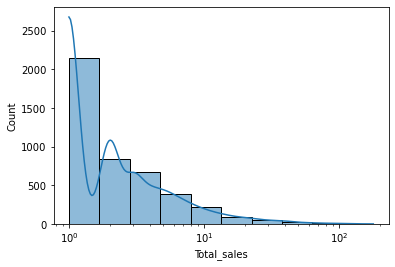

In [809]:
sn.histplot(merchant_perf.Total_sales,bins=10, kde=True, log_scale=True)

In [810]:
# Scatter plot of Quantity and Total sales plots size on the number of 
# orders delivered
fig = px.scatter(merchant_perf, x="Total_sales", y="Total_revenue", 
                 trendline="ols", size="Total_sales",
                labels={'x':'Total Revenue Collected', 'y':'Total Sales'}, 
                 title='Merchants total sales and revenue collected')
fig.show()

FROM ABOVE: The equation is total_revenue = 1633.44 * total_sales + 796.429
and R^2 = 0.3177 which shows that we cannot predict the variables closesly. Which makes sense as total revenue is derived from total sales.

In [811]:
merchant_perf[merchant_perf['Total_revenue'] > 300000]

,MERCHANT_ID,Total_revenue,Total_sales,Derivered,Canceled,Merchant_experience_months,Popular_sales_channel,SUB_IS_ACTIVE_FLAG,SUB_PLAN
1591,5755049,527458,179,163,1.0,42.0,1,True,business_account_3
52111,6064494,471140,5,5,NaN,28.0,2,False,NaN
244160,7175842,738285,18,15,NaN,6.0,2,True,business_account_3
276455,7340834,311766,14,13,NaN,4.0,2,True,business_account_3
297770,7637391,311784,12,12,NaN,1.0,2,False,NaN


In [812]:

merchant_perf.fillna(0)

,MERCHANT_ID,Total_revenue,Total_sales,Derivered,Canceled,Merchant_experience_months,Popular_sales_channel,SUB_IS_ACTIVE_FLAG,SUB_PLAN
0,265,1964,4,1,0.0,43.0,4,False,0
1,2071,5682,6,6,0.0,43.0,1,True,business_account_3
37,2686,25755,4,4,0.0,43.0,2,True,business_account_3
53,3058,845,1,1,0.0,45.0,2,False,0
54,3574,3675,6,5,0.0,46.0,2,True,business_account_3
...,...,...,...,...,...,...,...,...,...
298577,7723813,1001,1,1,0.0,0.0,2,False,0
298578,7724581,895,1,1,0.0,0.0,2,False,0
298579,7725819,414,1,1,0.0,0.0,2,False,0
298580,7726249,2184,1,1,0.0,0.0,2,False,0


# The Country Factor on the Dataset 

In [813]:
# % of orders sold in the US
len(merchant_country[printify_df['ADDRESS_TO_COUNTRY'] == 'US']) / len(merchant_country) * 100

88.11855835093783

In [814]:
tr = merchant_country.groupby(['ADDRESS_TO_COUNTRY']).count().sort_values(['MERCHANT_ID'])



# United states is so large that log scale was needed
fig = px.bar(tr, x=tr.index, y=np.log10(tr['MERCHANT_ID']), 
             title= "Top ten countries on Sales aganist Logarithm scale of Sales there")
fig.show()

In [815]:
tr = tr.tail(10)
val = np.log10(tr['MERCHANT_ID'])

fig = px.pie(tr, values=val, names=tr.index, title='Population of European continent', hole=0.3)
fig.show()

In [816]:
# Chart above without log scale
fig = px.pie(tr, values='MERCHANT_ID', names=tr.index, title='Population of European continent', hole=0.3)
fig.show()

# Success Factor 

Total Revenue / (Total sales + canceled orders * 0.8)

In [817]:
# Success factor for each merchant
merchant_perf['Success_factor'] = (merchant_perf['Total_revenue'].fillna(0)  / (merchant_perf['Total_sales'] + merchant_perf['Canceled'].fillna(0) * 0.8)) * np.log10(merchant_perf['Total_revenue'])
merchant_perf.sort_values(by=['Success_factor'])

,MERCHANT_ID,Total_revenue,Total_sales,Derivered,Canceled,Merchant_experience_months,Popular_sales_channel,SUB_IS_ACTIVE_FLAG,SUB_PLAN,Success_factor
148609,6956453,431,4,1,3.0,11.0,1,True,business_account_3,177.415579
49703,6047712,115,1,1,NaN,29.0,7,True,business_account_3,236.980252
138326,6911199,115,1,1,NaN,13.0,4,True,business_account_3,236.980252
296772,7589171,115,1,1,NaN,1.0,4,True,business_account_3,236.980252
220545,7135904,206,2,2,NaN,7.0,4,True,business_account_3,238.328324
...,...,...,...,...,...,...,...,...,...,...
102370,6788591,240440,10,10,NaN,16.0,2,True,business_account_3,129380.925559
260341,7231041,184615,7,5,NaN,5.0,2,True,business_account_3,138890.268481
297770,7637391,311784,12,12,NaN,1.0,2,False,NaN,142741.310068
244160,7175842,738285,18,15,NaN,6.0,2,True,business_account_3,240690.099384


In [818]:
# MOre weight is placed on the revenue than sales made
merchant_perf['Success_factor'].corr(merchant_perf['Total_revenue'])

0.6862874055837919

In [819]:
merchant_perf['Success_factor'].corr(merchant_perf['Total_sales'])

0.06424509488803862

In [820]:
# Interesting. 
# The more experience you are the less likely you are successful
merchant_perf['Success_factor'].corr(merchant_perf['Merchant_experience_months'])

-0.01721375214404431

In [825]:
merchant_perf['Success_factor'].corr(merchant_perf['Popular_sales_channel'])

-0.09666388044265528

In [826]:
merchant_perf['Success_factor'].corr(merchant_perf['SUB_IS_ACTIVE_FLAG'])

-0.03536945824201228

In [836]:
val_x = np.log2(merchant_perf['Total_revenue'])
val_y = np.log2(merchant_perf['Success_factor'])

fig = px.scatter(merchant_perf, x=val_x, y=val_y, 
                 trendline="ols", size="Total_sales",
                labels={'x':'log10(Total Revenue)', 'y':'log10(Sucess Factor)'}, 
                 title='Relationship of revenue collected aganist Marchants Success Factor')
fig.show()

In [841]:
val_x = np.log2(merchant_perf['Total_sales'])
val_y = np.log2(merchant_perf['Success_factor'])

fig = px.scatter(merchant_perf, x=val_x, y=val_y, 
                 trendline="ols", size="Total_revenue",
                labels={'x':'log10(Total Sales)', 'y':'log10(Sucess Factor)'}, 
                 title='Relationship of Total sales aganist Marchants Success Factor')
fig.show()

In [ ]:
merchant_perf[merchant_perf[]]

In [821]:
printify_df[printify_df['MERCHANT_ID'] == 7175842]

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,...,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
3318,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,23,Premium Cases,Phone Case,shipment_delivered,1
3319,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,16,Generic brand,Hats,shipment_delivered,1
3320,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,39,Fruit Of The Loom,Hoodie,shipment_delivered,1
3321,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,33,Generic brand,Accessories,shipment_delivered,2
3322,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,45,Lane Seven,T-Shirt,shipment_delivered,2
3323,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,16,Generic brand,T-Shirt,shipment_delivered,1
3324,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,39,Next Level,T-Shirt,shipment_delivered,1
3325,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,27,Lane Seven,Sweatshirt,shipment_delivered,1
3326,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,43,Bella+Canvas,T-Shirt,shipment_delivered,2
3327,7175842,18.0,1758231,US,VA,2020-10-25 21:54:38,2020-11-04 10:55:17,NaN,2,49219,...,2020-06-09 21:27:41,True,business_account_3,USPS,2020-10-28 16:24:07,45,Lane Seven,Hoodie,shipment_delivered,1


In [822]:
printify_df

,MERCHANT_ID,ORDER_ID,SHOP_ID,ADDRESS_TO_COUNTRY,ADDRESS_TO_REGION,ORDER_DT,FULFILLED_DT,REPRINT_FLAG,SALES_CHANNEL_TYPE_ID,TOTAL_COST,...,MERCHANT_REGISTERED_DT,SUB_IS_ACTIVE_FLAG,SUB_PLAN,SHIPMENT_CARRIER,SHIPMENT_DELIVERD_DT,PRINT_PROVIDER_ID,PRODUCT_BRAND,PRODUCT_TYPE,ITEM_STATUS,QUANTITY
0,7143578,178.0,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,...,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29,1,Generic brand,Mug,shipment_delivered,1
1,7143578,178.0,2013244,US,WA,2020-10-02 19:30:15,2020-10-20 07:53:06,NaN,9,2902,...,2020-05-19 15:22:57,True,business_account_3,UPS,2020-10-08 21:07:29,16,Generic brand,Mug,shipment_delivered,1
2,5888534,695.0,1358429,US,MN,2020-11-21 05:19:03,2020-11-23 00:23:32,NaN,4,1149,...,2018-02-08 07:34:02,True,business_account_3,USPS,2020-11-28 21:50:56,39,Gildan,Sweatshirt,shipment_delivered,1
3,6484224,193.0,939390,US,AK,2020-10-25 01:39:08,2020-10-26 20:30:53,NaN,1,977,...,2019-04-09 20:02:46,True,business_account_3,USPS,2020-11-02 23:37:54,25,Delta,T-Shirt,shipment_delivered,1
4,7251033,4.0,1856107,US,PA,2020-10-08 16:35:21,2020-10-10 15:02:47,NaN,1,661,...,2020-07-20 17:04:41,True,business_account_3,UPS,2020-10-15 18:08:37,16,Generic brand,Mug,shipment_delivered,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,7562898,12.0,2225081,CA,ON,2020-11-05 21:12:29,NaT,NaN,1,0,...,2020-10-29 16:51:47,False,NaN,NaN,NaT,10,Generic brand,Accessories,canceled,10
15617,7475289,2224.0,2153683,US,CO,2020-11-16 04:11:43,NaT,NaN,1,1447,...,2020-09-30 23:11:41,True,business_account_3,NaN,NaT,16,Sport-Tek,Hats,on-hold,1
15618,7144356,5.0,1717607,US,CT,2020-12-25 00:08:07,NaT,NaN,1,2187,...,2020-05-20 01:38:41,False,NaN,NaN,NaT,3,Gildan,Hoodie,on-hold,1
15619,7581194,66.0,2243420,US,IN,2020-11-19 16:43:04,NaT,NaN,4,2187,...,2020-11-05 20:02:09,False,NaN,NaN,NaT,3,Gildan,Hoodie,canceled,1


In [823]:
merchant_country = printify_df[['MERCHANT_ID','ADDRESS_TO_COUNTRY']]
merchant_country[printify_df['ADDRESS_TO_COUNTRY'] == 'US'].groupby(['ADDRESS_TO_COUNTRY']).count()

,MERCHANT_ID
ADDRESS_TO_COUNTRY,
US,13765


In [824]:
# Top merchants sell in United States which has the 
# highest value of 88.12%


